In [ ]:
# Import libraries for data handling, numerical computation, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assign column names and load the Glass dataset into a DataFrame
column_names = [
    "Id",
    "Refractive_Index",
    "Sodium",
    "Magnesium",
    "Aluminum",
    "Silicon",
    "Potassium",
    "Calcium",
    "Barium",
    "Iron",
    "Glass_Type"
]

df = pd.read_csv(r"C:\Users\rohit\Desktop\ML-LAB\glass identification\glass.data", header=None, names=column_names)

In [ ]:
# Preview initial and final rows and check dataset dimensions
display(df.head())
display(df.tail())
print(f"No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}")

,Id,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


,Id,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


No of Rows: 214, No of Columns: 11


In [ ]:
# Inspect dataset structure, data types, and non-null values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                214 non-null    int64  
 1   Refractive_Index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Glass_Type        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


None

In [ ]:
# Remove ID column and verify absence of missing values
df = df.drop(columns=["Id"])

print(df.isnull().sum())

Refractive_Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Glass_Type          0
dtype: int64


In [ ]:
# Analyze class distribution of the target variable
df["Glass_Type"].value_counts()

Glass_Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [ ]:
# Map numeric glass types to descriptive class labels
glass_type_labels = {
    1: "Building Windows (Float)",
    2: "Building Windows (Non-Float)",
    3: "Vehicle Windows (Float)",
    5: "Containers",
    6: "Tableware",
    7: "Headlamps"
}
df["Glass_Type_Label"] = df["Glass_Type"].map(glass_type_labels)


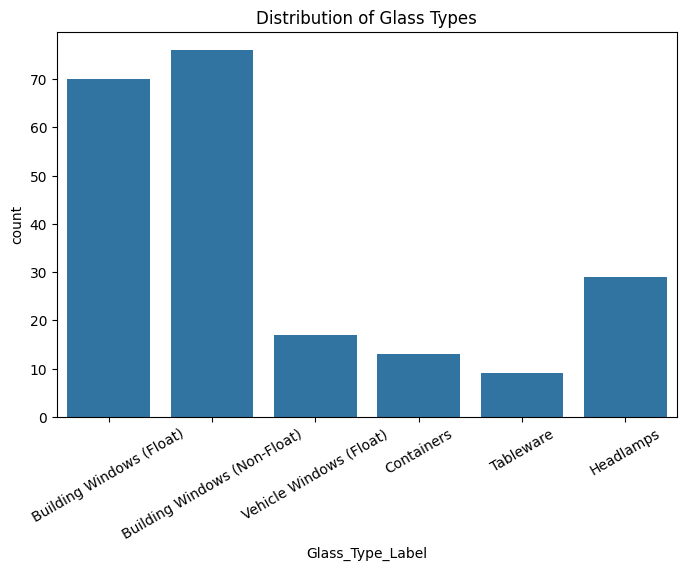

In [ ]:
# Visualize class distribution using a count plot
plt.figure(figsize=(8,5))
sns.countplot(x="Glass_Type_Label", data=df)
plt.title("Distribution of Glass Types")
plt.xticks(rotation=30)
plt.show()

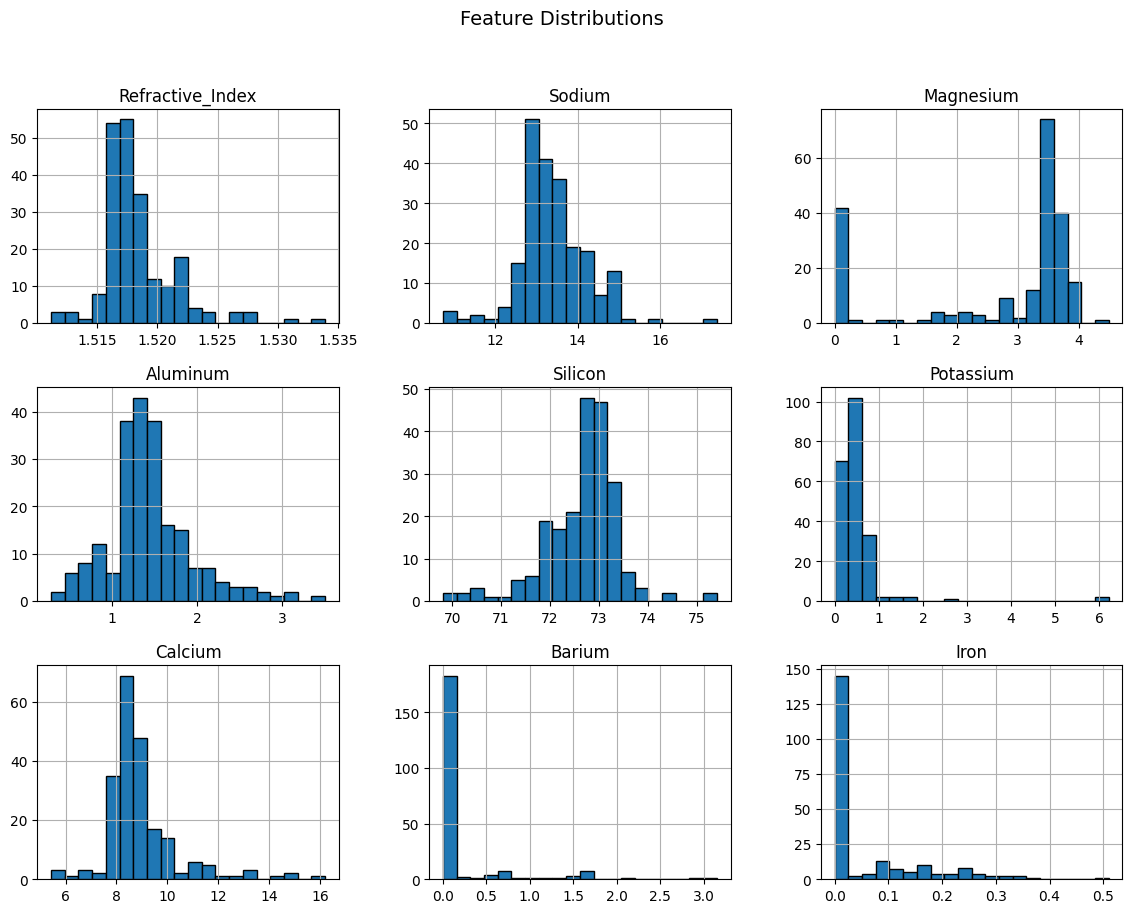

In [ ]:
# Plot histograms to examine feature distributions
df.drop(columns=["Glass_Type", "Glass_Type_Label"]).hist(
    figsize=(14,10),
    bins=20,
    edgecolor="black"
)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


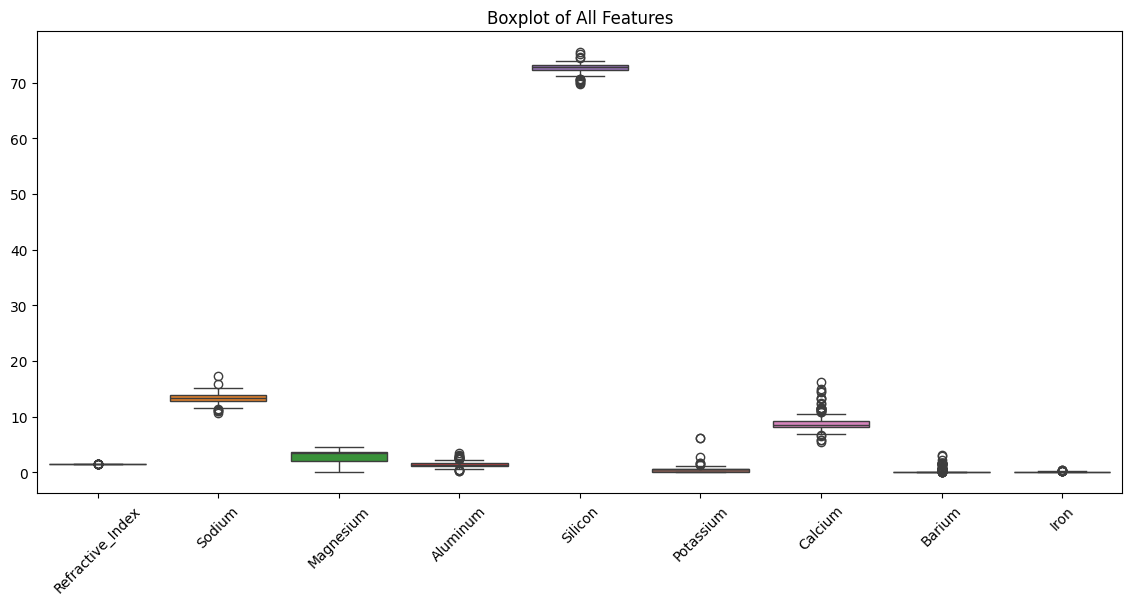

In [ ]:
# Detect outliers and variability using boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=df.drop(columns=["Glass_Type", "Glass_Type_Label"]))
plt.xticks(rotation=45)
plt.title("Boxplot of All Features")
plt.show()


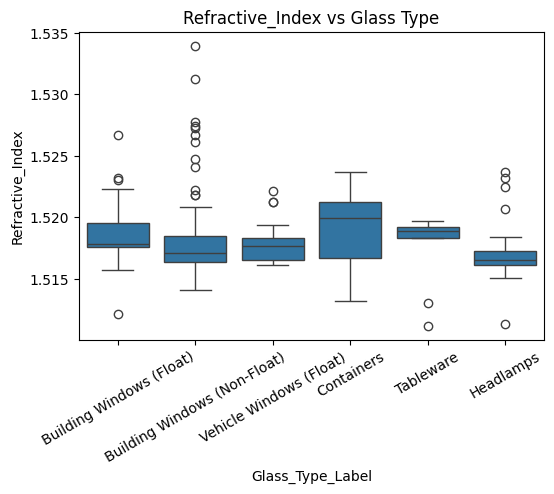

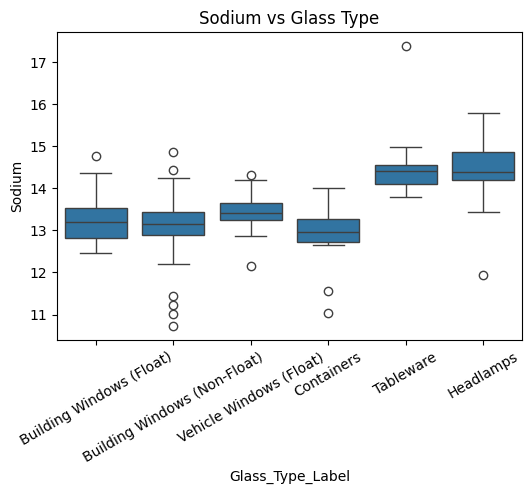

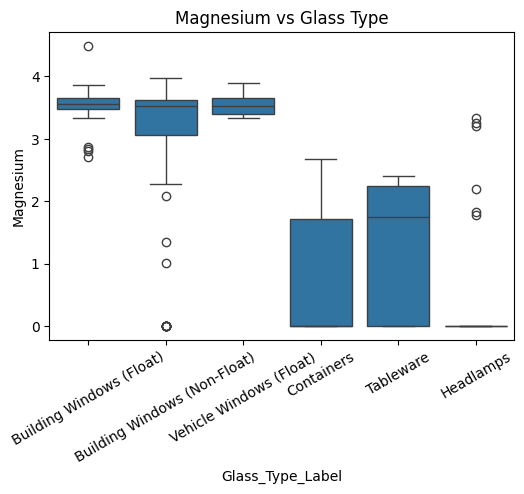

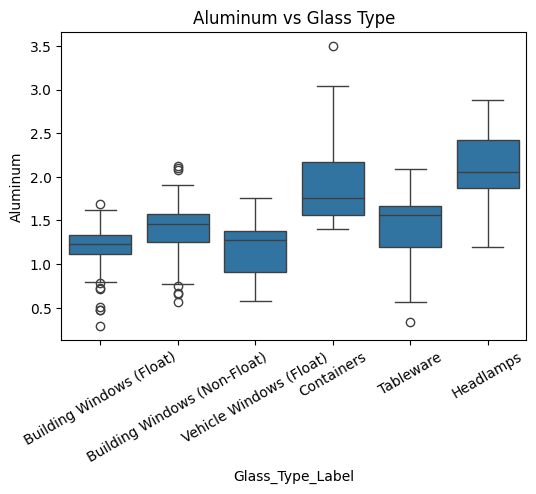

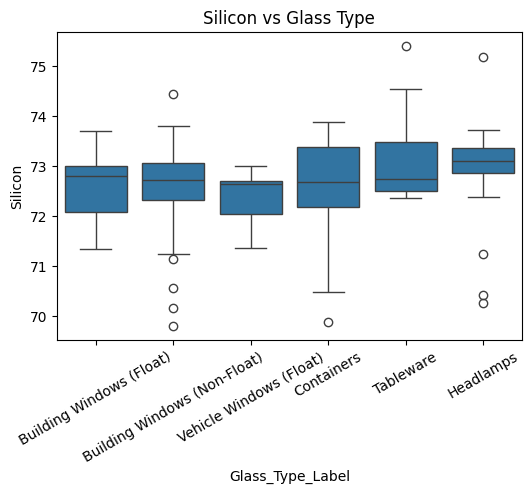

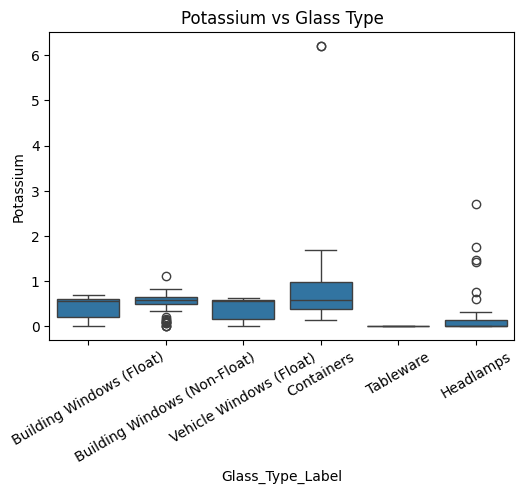

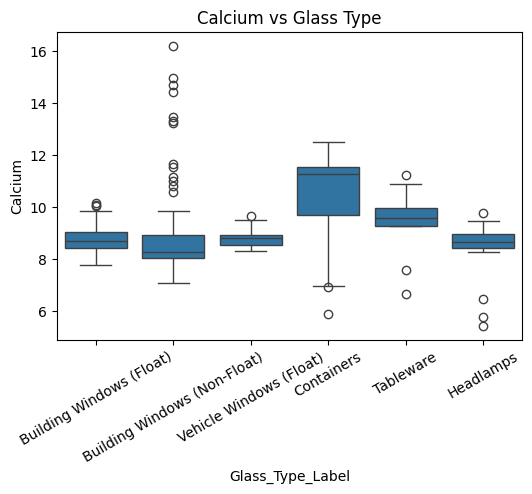

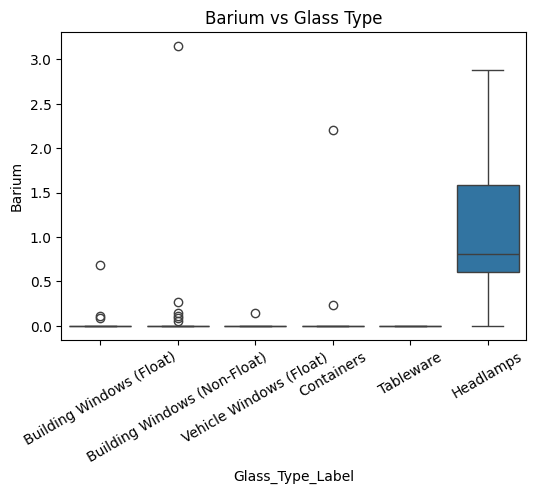

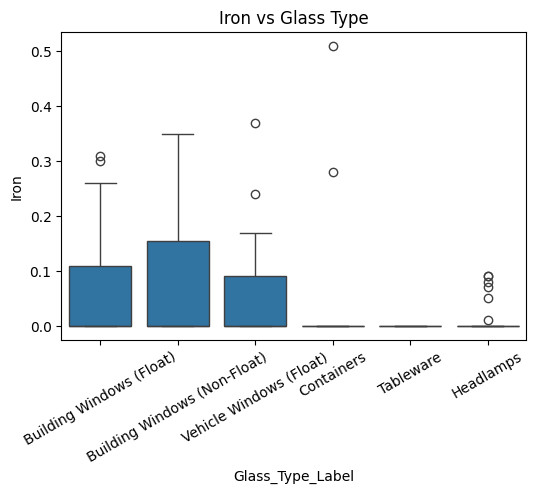

In [ ]:
# Compare feature distributions across different glass types
for col in df.columns[:-2]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Glass_Type_Label", y=col, data=df)
    plt.xticks(rotation=30)
    plt.title(f"{col} vs Glass Type")
    plt.show()


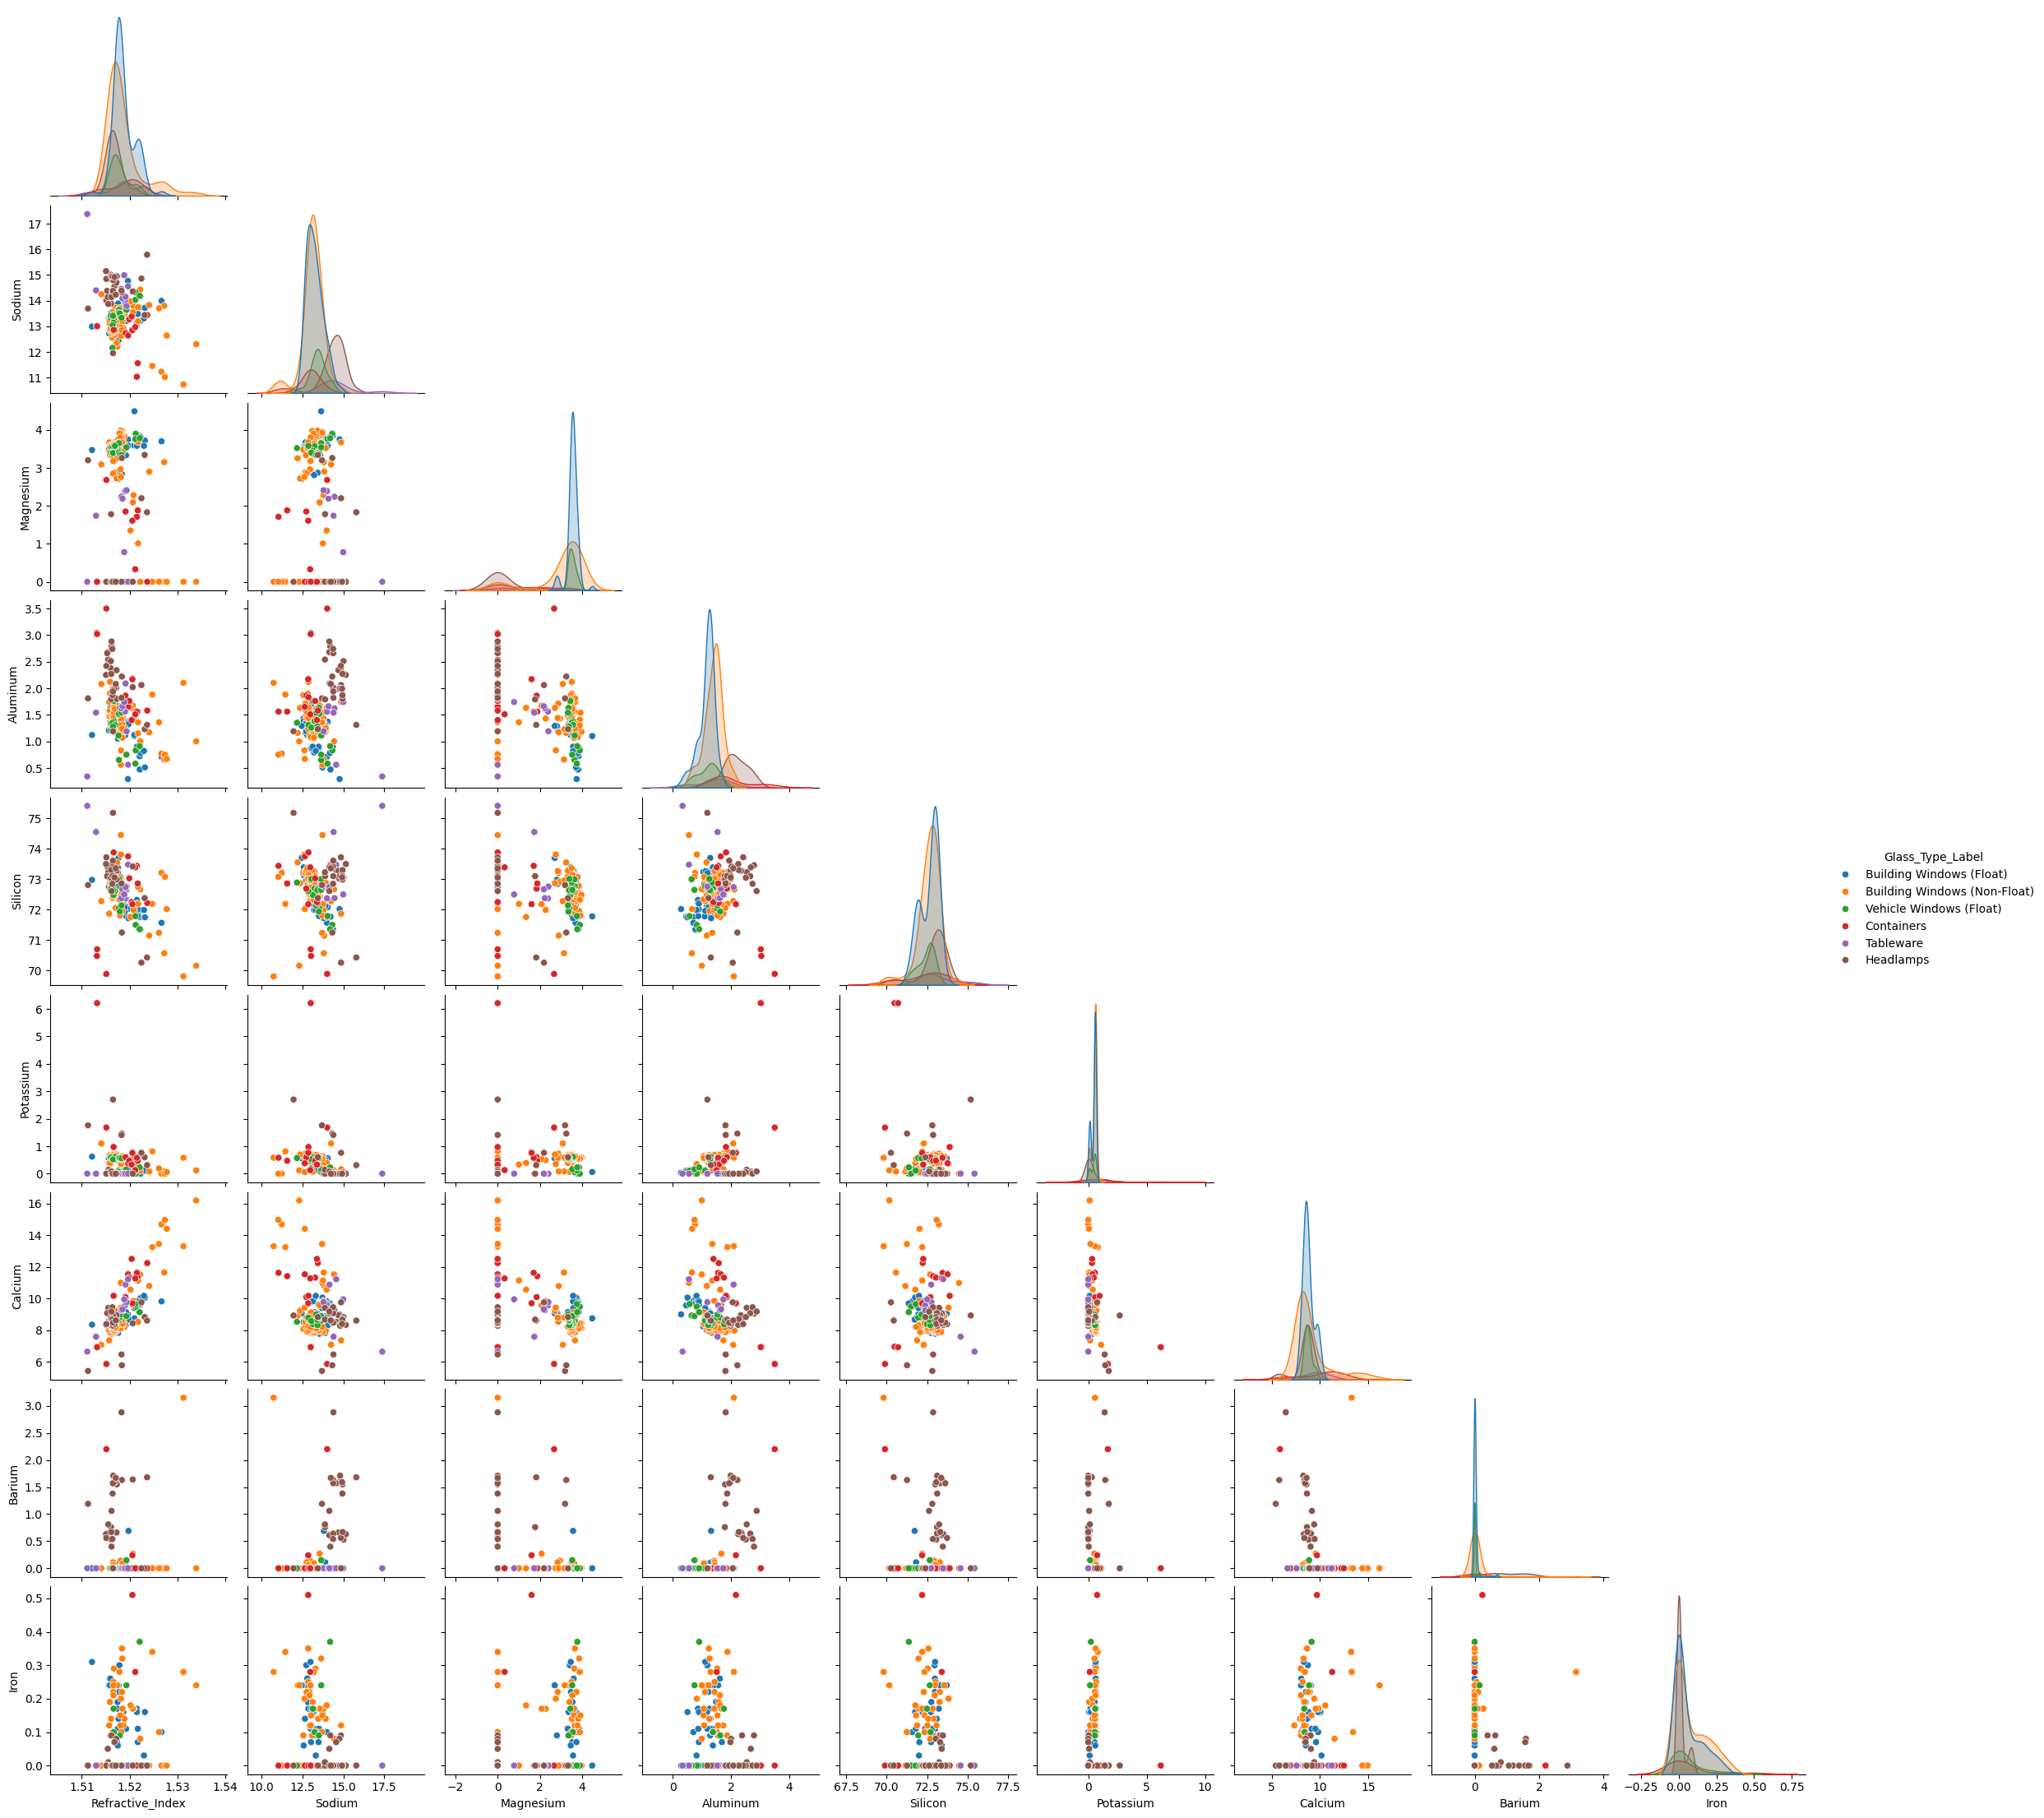

In [ ]:
# Examine pairwise feature relationships and class separability
sns.pairplot(
    df,
    hue="Glass_Type_Label",
    vars=df.columns[:-2],
    corner=True
)
plt.show()

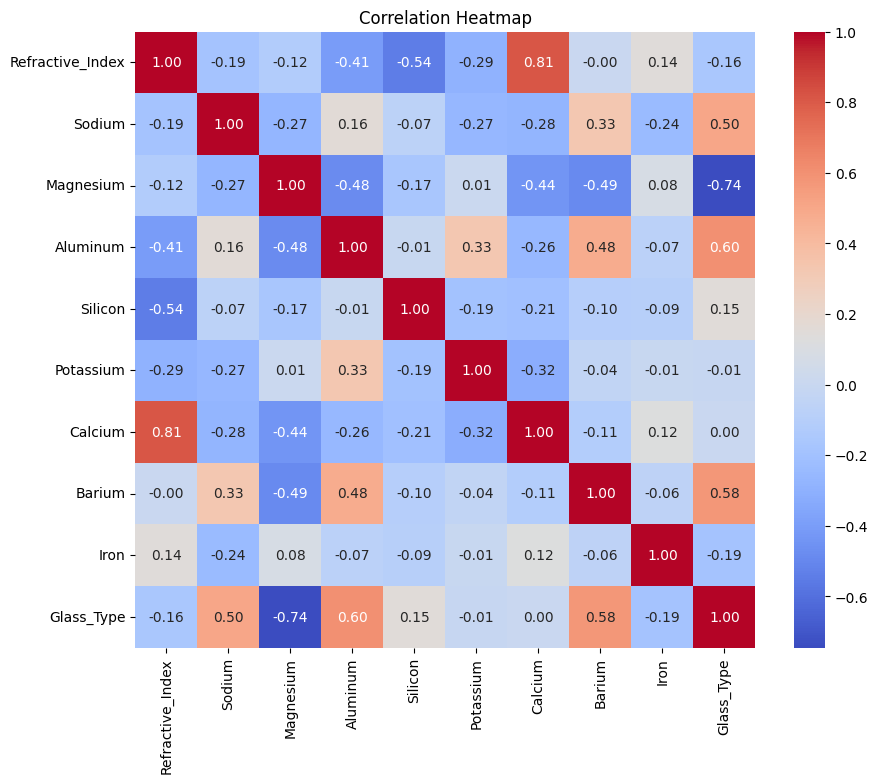

In [ ]:
# Compute and visualize feature correlations using a heatmap
corr_matrix = df.drop(columns=["Glass_Type_Label"]).corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Compute measures of central tendency (mean, median, mode)
display(df.mean(numeric_only=True))
display(df.median(numeric_only=True))
display(df.mode().iloc[0])


Refractive_Index     1.518365
Sodium              13.407850
Magnesium            2.684533
Aluminum             1.444907
Silicon             72.650935
Potassium            0.497056
Calcium              8.956963
Barium               0.175047
Iron                 0.057009
Glass_Type           2.780374
dtype: float64

Refractive_Index     1.51768
Sodium              13.30000
Magnesium            3.48000
Aluminum             1.36000
Silicon             72.79000
Potassium            0.55500
Calcium              8.60000
Barium               0.00000
Iron                 0.00000
Glass_Type           2.00000
dtype: float64

Refractive_Index                          1.5159
Sodium                                      13.0
Magnesium                                    0.0
Aluminum                                    1.54
Silicon                                    72.86
Potassium                                    0.0
Calcium                                     8.03
Barium                                       0.0
Iron                                         0.0
Glass_Type                                   2.0
Glass_Type_Label    Building Windows (Non-Float)
Name: 0, dtype: object

In [ ]:
# Analyze distribution shape using skewness and kurtosis
display(df.skew(numeric_only=True))
display(df.kurtosis(numeric_only=True))


Refractive_Index    1.625431
Sodium              0.454181
Magnesium          -1.152559
Aluminum            0.907290
Silicon            -0.730447
Potassium           6.551648
Calcium             2.047054
Barium              3.416425
Iron                1.754327
Glass_Type          1.114915
dtype: float64

Refractive_Index     4.931737
Sodium               3.052232
Magnesium           -0.410319
Aluminum             2.060569
Silicon              2.967903
Potassium           54.689699
Calcium              6.681978
Barium              12.541084
Iron                 2.662016
Glass_Type          -0.279518
dtype: float64

In [ ]:
# Generate five-number statistical summary of the dataset
df.describe()

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000
